In [55]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
# Reading dataset day.csv
bike = pd.read_csv(r'C:\Users\abhin\Documents\Updrad\bikeSharing\day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Ananlysing DATA

In [57]:
bike.shape

(730, 16)

In [58]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [59]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Cleaning Dataset

#### Droping columns that are not useful for analysis : instant , dteday , atemp , casual and registered 

In [60]:
bike.drop(['instant'], axis = 1, inplace = True)

bike.drop(['dteday'], axis = 1, inplace = True)

bike.drop(['atemp'], axis = 1, inplace = True)

bike.drop(['casual'], axis = 1, inplace = True)

bike.drop(['registered'], axis = 1, inplace = True)

In [61]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


#### Checking missing values

In [62]:
bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

###### Observation : No Missing values found

#### Checking outliers in Continues data Columns which are : temperature (temp) , humidity (hum) , windspeed

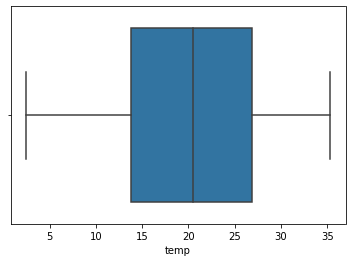

In [63]:
sns.boxplot(bike['temp'])
plt.show()

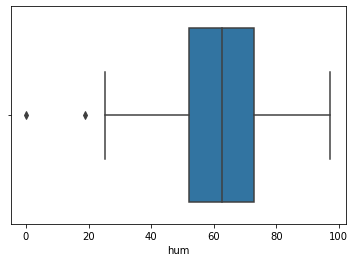

In [64]:
sns.boxplot(bike['hum'])
plt.show()

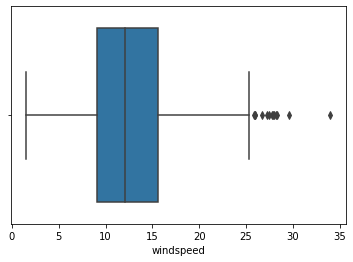

In [65]:
sns.boxplot(bike['windspeed'])
plt.show()

###### Observation : As you can see outliers found are not so high such that it will affect the observations thus no need of imputation

# Exploratory Data Analysis

In [66]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


#### Converting season , mnth , weekday , weathersit from Binary to Categorical values

In [67]:
bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',
                                         6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',
                                         11: 'nov',12: 'dec'})

bike.weathersit.replace({1:'clear',2:'average',3:'bad',4:'extreme'},inplace = True)

bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [68]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,average,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,average,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


#### Checking continuous variables relationship with each other

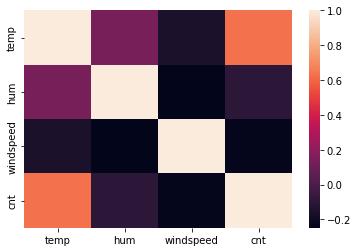

In [69]:
sns.heatmap(bike[['temp','hum','windspeed','cnt']].corr())
plt.show()

#### Checking numerical variables relationship with each other

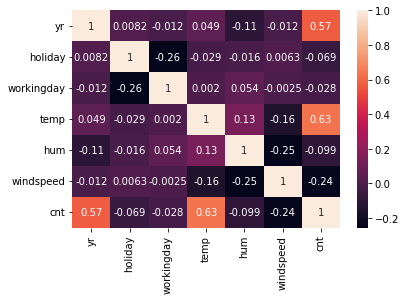

In [70]:
cor=bike.corr()
sns.heatmap(cor, annot = True)
plt.show()

#### Checking Categorical variables relationship with Target Variable that is "cnt"

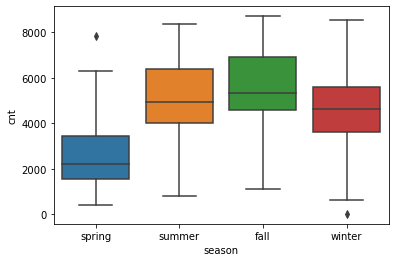

In [71]:
# season
sns.boxplot(data=bike, x='season', y='cnt')
plt.show()

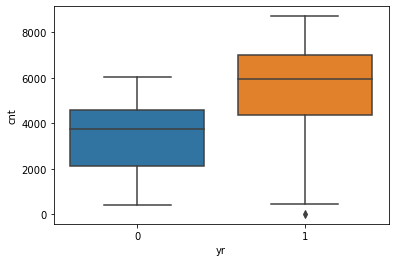

In [72]:
# yr
sns.boxplot(data=bike, x='yr', y='cnt')
plt.show()

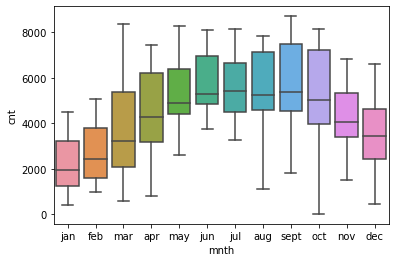

In [73]:
# mnth
sns.boxplot(data=bike, x='mnth', y='cnt')
plt.show()

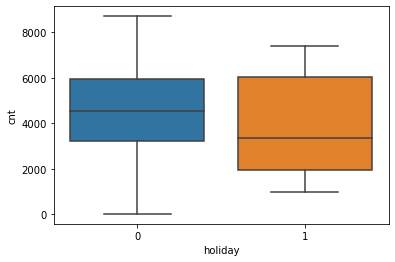

In [74]:
# holiday
sns.boxplot(data=bike, x='holiday', y='cnt')
plt.show()

# Dummy Variable , Splitting , Scalling

In [75]:
# Creating Dummy of all categorical type variables

bike = pd.get_dummies(data=bike,columns=["season","mnth","weekday"],drop_first=True)
bike = pd.get_dummies(data=bike,columns=["weathersit"])

In [76]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_average,weathersit_bad,weathersit_clear
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
# Observation : all the dummies are now added in the bikesharing dataframe

In [78]:
# importing required liberaries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# splitting data into X and y
# y is 'cnt' target variable
y = bike.pop('cnt')


In [80]:
# X is all remaining independent variables
X = bike

In [81]:
# Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
X.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_average,weathersit_bad,weathersit_clear
0,0,0,1,14.110847,80.5833,10.749882,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Scalling of Continueos Variables

In [83]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [87]:
num_vars = ['temp','hum','windspeed']

scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [89]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_average,weathersit_bad,weathersit_clear
683,1,0,1,0.327133,0.639330,0.327101,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
645,1,1,0,0.403972,0.731215,0.419004,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
163,0,0,1,0.717562,0.509660,0.708724,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
360,0,0,1,0.331287,0.785745,0.415925,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
640,1,0,1,0.745598,0.817947,0.110593,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


# Model Building using RFE 

In [90]:
# Building Lienar Regression model 
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [91]:
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

#### Observation : Linear Regression model and rfe with fit has been genrated

In [92]:
# checking RFE Ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 12),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 2),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 4),
 ('weekday_sat', False, 11),
 ('weekday_sun', False, 10),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 5),
 ('weathersit_average', False, 3),
 ('weathersit_bad', True, 1),
 ('weathersit_clear', True, 1)]

In [93]:
# data columns selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_may',
       'mnth_nov', 'mnth_sept', 'weathersit_bad', 'weathersit_clear'],
      dtype='object')

In [94]:
# data columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_average'],
      dtype='object')

In [97]:
# Taking columns which we will use for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad','weathersit_clear']]

In [98]:
# Checking X_train_rfe shape
X_train_rfe.shape

(511, 15)

In [99]:
colms = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_clear']

In [104]:
#Function to build models
def build_model(colms):
    X_train_sm = sm.add_constant(X_train[colms])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [105]:
#Function to calculate VIF
def get_vif(colms):
    df1 = X_train[colms]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## MODEL 1

In [106]:
build_model(colms)
get_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.70e-181
Time:                        14:00:51   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2344.9512    380.978  

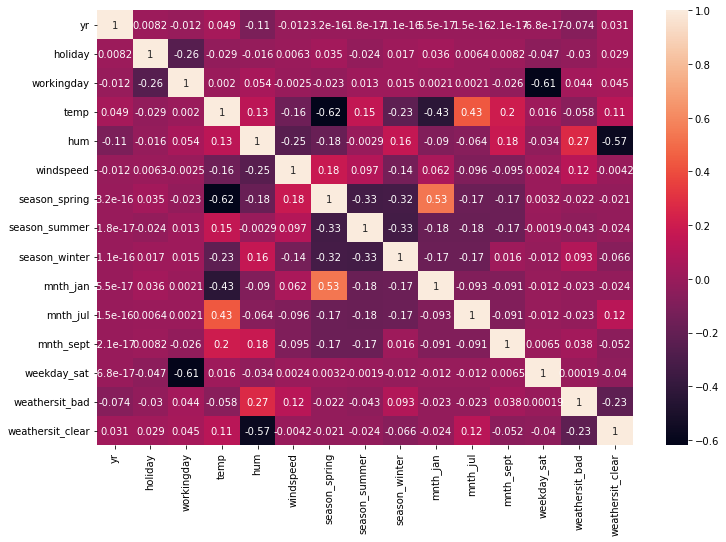

In [109]:
# Checking correlation with target column. 
plt.figure(figsize = (12,8))
sns.heatmap(bike[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_clear']].corr(), annot=True)
plt.show()

## MODEL 2

In [111]:
# Dropping mnth_jan for being insignificant as it has negative coefficient and high p-value
colms = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_clear']
build_model(colms)
get_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.35e-182
Time:                        14:05:14   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2329.4934    378.509  

#### Observation : all columns have p-value > .05 

## MODEL 3

In [113]:
# Dropping hum for being insignificant as it has negative coefficient and high p-value
colms = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_clear']
build_model(colms)
get_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          3.37e-180
Time:                        14:10:03   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1318.2141    290.530  

## MODEL 4

In [114]:
# Dropping holiday for being insignificant as it has negative coefficient and high p-value
colms = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_clear']
build_model(colms)
get_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.51e-178
Time:                        14:10:08   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1169.0872    291.090  

## MODEL 5

In [115]:
# Dropping mnth_jul for being insignificant as it has negative coefficient and high p-value
colms = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_clear']
build_model(colms)
get_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          8.20e-179
Time:                        14:10:58   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1109.4321    290.560  

## MODEL 6

In [116]:
# removing all insignificant columns and building final model for interpretation
colms = ['yr', 'temp', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_clear']

build_model(colms)
get_vif(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          9.73e-178
Time:                        14:17:29   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1078.3474    206.731  

# Error Terms

In [122]:
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

In [125]:
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [126]:
colms = ['yr', 'temp','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_clear']

#Build a model with above columns
lr = build_model_sk(X_train[colms],y_train)
print(lr.intercept_,lr.coef_)

1078.347379599997 [ 1994.67955569  3984.25555511 -1167.70089558  -514.63181313
   496.75430396   465.92729708   190.37518346 -1593.71496239
   662.38986442]


In [128]:
y_train_pred = lr.predict(X_train[colms])

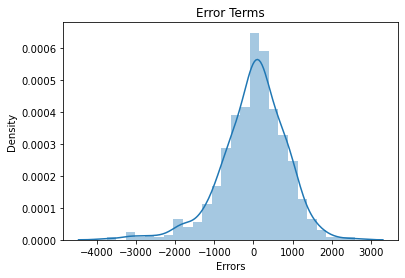

In [129]:
#Plot a histogram of the error terms
plot_res_dist(y_train, y_train_pred)

# Model Interpretation

In [119]:
# using final model to interpret it
colms = ['yr', 'temp', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_clear']

lm = build_model(colms)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          9.73e-178
Time:                        14:26:26   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1078.3474    206.731  

# Conclusion

#### Company should focus on month of sept in spring season for increasing sales
#### Rainy weather decreses sales potential
#### Sunday is a better weakday day of sales thus a litte increase in demand can be seen especially in month of september

#### Final variables to predict the demand of shared bikes are :
#### 'yr',
#### 'temp',
#### 'season_spring',
#### 'mnth_jul',
#### 'season_winter', 
#### 'mnth_sept', 
#### 'weekday_sun',
#### 'weathersit_bad',
#### 'weathersit_clear'